__Profiles__

In this example, we'll create a grid of Cartesian (y,x) coordinates and pass it to the 'light_profiles'  module to create images on this grid and the 'mass_profiles' module to create deflection-angle maps on this grid. 

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

Lets use the same grid as the previous tutorial (if you skipped that tutorial, I recommend you go back to it!)

In [2]:
grid = al.grid.uniform(shape_2d=(100, 100), pixel_scales=0.05, sub_size=2)

Next, lets create a light profile using the 'light_profiles' module, which in PyAutoLens is imported as 'lp' for conciseness. We'll use a Sersic function, which is an analytic function often use to depict galaxies.

In [3]:
sersic_light_profile = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    axis_ratio=0.8,
    phi=45.0,
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

We can print a profile to confirm its parameters.

In [4]:
print(sersic_light_profile)

EllipticalSersic
centre: (0.0, 0.0)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


We can pass a grid to a light profile to compute its intensity at every grid coordinate. When we compute an array from a grid using a '_from_grid' method like the one below, we have two options for how the calculation is performed.

In [5]:
light_profile_image = sersic_light_profile.profile_image_from_grid(
    grid=grid,
)

Much like the grids in the previous tutorials, the arrays PyAutoLens computes from these methods are accessible in both 2D and 1D.

In [7]:
print(light_profile_image.shape_2d)
print(light_profile_image.shape_1d)
print(light_profile_image.in_2d[0, 0])
print(light_profile_image.in_1d[0])
print(light_profile_image.in_2d)
print(light_profile_image.in_1d)

(100, 100)
10000
0.03314307774883969
0.03314307774883969
[[0.03314308 0.03368555 0.03423676 ... 0.06804389 0.0670483  0.06606236]
 [0.03368555 0.03424039 0.03480426 ... 0.06908197 0.06806002 0.0670483 ]
 [0.03423676 0.03480426 0.03538108 ... 0.07013085 0.06908197 0.06804389]
 ...
 [0.06804389 0.06908197 0.07013085 ... 0.03538108 0.03480426 0.03423676]
 [0.0670483  0.06806002 0.06908197 ... 0.03480426 0.03424039 0.03368555]
 [0.06606236 0.0670483  0.06804389 ... 0.03423676 0.03368555 0.03314308]]
[0.03314308 0.03368555 0.03368555 ... 0.03368555 0.03368555 0.03314308]


The values computed (e.g. the image) are calculated on the sub-grid and the returned values are stored on the sub-grid, which in this case is a 200 x 200 grid.

In [8]:
print(light_profile_image.sub_shape_2d)
print(light_profile_image.sub_shape_1d)
print(light_profile_image.in_2d[0, 0])
print(light_profile_image[0])

(200, 200)
40000
0.03314307774883969
0.03314307774883969


The benefit of storing all the values on the sub-grid, is that we can now use these values to bin-up the regular grid's shape by taking the mean of each intensity value computed on the sub-grid. This ensures that aliasing effects due to computing intensities at only one pixel coordinate inside a full pixel do not degrade the image we create.

In [9]:
print("intensity of top-left grid pixel:")
print(light_profile_image.in_2d_binned[0, 0])
print(light_profile_image.in_1d_binned[0])

intensity of top-left grid pixel:
0.0336886423978944
0.0336886423978944


If you find these 2D and 1D arrays confusing - I wouldn't worry about it. From here on, we'll pretty much just use these arrays as they returned to us from functions and not think about if they should be in 2D or 1D. Nevertheless, its important that you understand PyAutoLens offers these 2D and 1D representations - as it'll help us later when we cover fititng lens data!

We can use a profile plotter to plot this image.

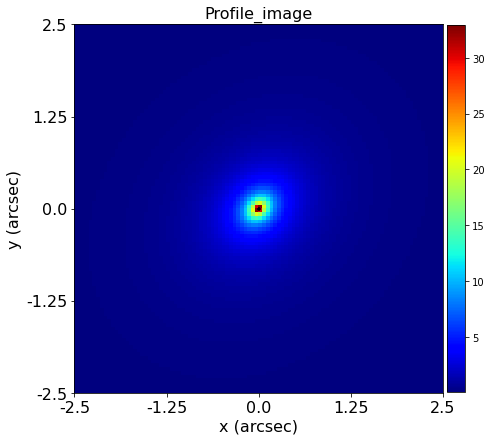

In [10]:
aplt.lp.profile_image(light_profile=sersic_light_profile, grid=grid)

To perform ray-tracing, we need to create a 'mass-profile' from the mass profiles module, which we import as mp for conciseness. A mass-profile is an analytic function that describes the distribution of mass in a galaxy, and therefore can be used to derive its surface-density, gravitational potential and most importantly, its deflection angles. For those unfamiliar with lensing, the deflection angles describe how light is bent by the mass-profile due to the curvature of space-time.

In [11]:
sis_mass_profile = al.mp.SphericalIsothermal(
    centre=(0., 0.), einstein_radius=1.6
)

print(sis_mass_profile)

SphericalIsothermal
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


Just like above, we can pass a grid to a mass-profile to compute its deflection angles. These are returned as the grids we used in the previous tutorials, so have full access to the 2D / 1D methods and mappings. And, just like the image above, they are computed on the sub-grid, so that we can bin up their values to compute more accurate deflection angles.

(If you are new to gravitiational lensing, and are unclear on what a 'deflection-angle' means or what it is used for, then I'll explain all in tutorial 4 of this chapter. For now, just look at the pretty pictures they make, and worry about what they mean in tutorial 4!).

In [12]:
mass_profile_deflections = sis_mass_profile.deflections_from_grid(
    grid=grid,
)

print("deflection-angles of grid sub-pixel 0:")
print(mass_profile_deflections.in_2d[0, 0])
print("deflection-angles of grid sub-pixel 1:")
print(mass_profile_deflections.in_2d[0, 1])
print()
print("deflection-angles of grid pixel 0:")
print(mass_profile_deflections.in_2d_binned[0, 1])
print()
print("deflection-angles of central grid pixels:")
print(mass_profile_deflections.in_2d_binned[49, 49])
print(mass_profile_deflections.in_2d_binned[49, 50])
print(mass_profile_deflections.in_2d_binned[50, 49])
print(mass_profile_deflections.in_2d_binned[50, 50])

deflection-angles of grid sub-pixel 0:
[ 1.13137085 -1.13137085]
deflection-angles of grid sub-pixel 1:
[ 1.13707034 -1.1256425 ]

deflection-angles of grid pixel 0:
[ 1.14284852 -1.11976067]

deflection-angles of central grid pixels:
[ 1.07164985 -1.07164985]
[1.07164985 1.07164985]
[-1.07164985 -1.07164985]
[-1.07164985  1.07164985]


A profile plotter can plot these deflection angles.

(The black line is the 'critical curve' of the mass profile. We'll cover what this in a later tutorial.)

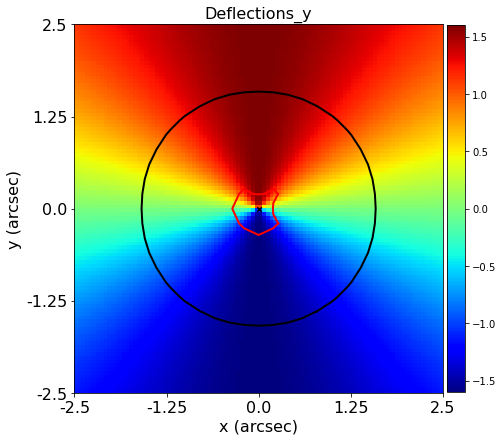

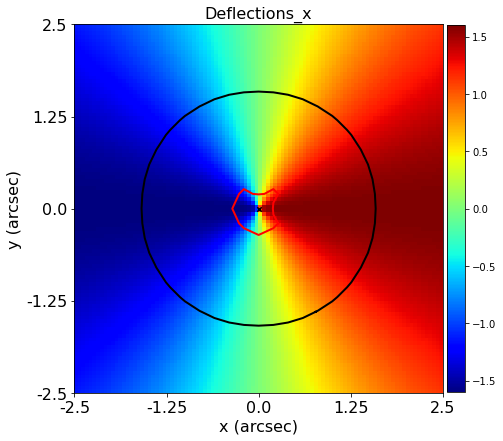

In [13]:
aplt.mp.deflections_y(mass_profile=sis_mass_profile, grid=grid)
aplt.mp.deflections_x(mass_profile=sis_mass_profile, grid=grid)

Mass profiles have a range of other properties that are used for lensing calculations, a couple of which we've plotted images of below:

Convergence - The surface mass density of the mass-profile in dimensionless unit_label which are convenient for lensing calcuations.
Potential - The gravitational of the mass-profile again in convenient dimensionless unit_label.
Magnification - Describes how much brighter each image-pixel appears due to focusing of light rays by the mass-profile.

Extracting arrays of these quantities fom PyAutoLens is exactly the same as for the image and deflection angles above.

In [14]:
mass_profile_convergence = sis_mass_profile.convergence_from_grid(
    grid=grid,
)

mass_profile_potential = sis_mass_profile.potential_from_grid(grid=grid)

mass_profile_magnification = sis_mass_profile.magnification_from_grid(grid=grid)

Plotting them is equally straight forward.

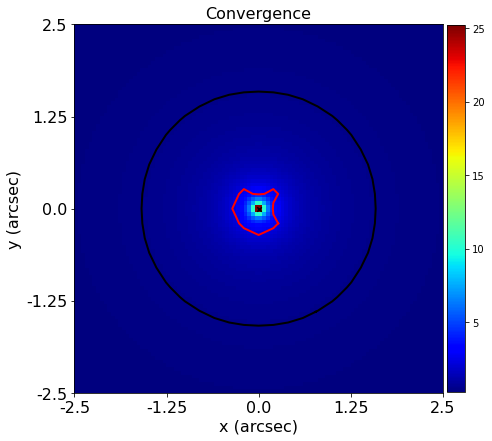

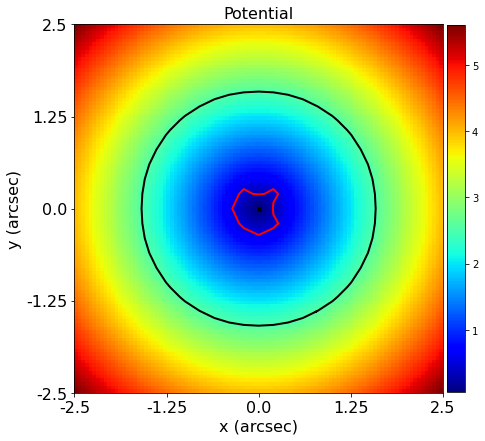

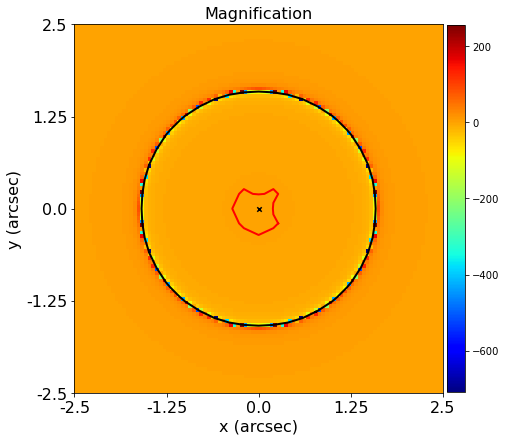

In [15]:
aplt.mp.convergence(
    mass_profile=sis_mass_profile, grid=grid
)

aplt.mp.potential(mass_profile=sis_mass_profile, grid=grid)

aplt.mp.magnification(mass_profile=sis_mass_profile, grid=grid)

Congratulations, you've completed your second PyAutoLens tutorial! Before moving on to the next one, experiment with PyAutoLens by doing the following:

1) Change the light profile's effective radius and Sersic index - how does the image's appearance change?
2) Change the mass profile's einstein radius - what happens to the deflection angles, potential and convergence?
3) Experiment with different light-profiles and mass-profiles in the light_profiles and mass_profiles modules. In particular, use the EllipticalIsothermal profile to introduce ellipticity into a mass profile.

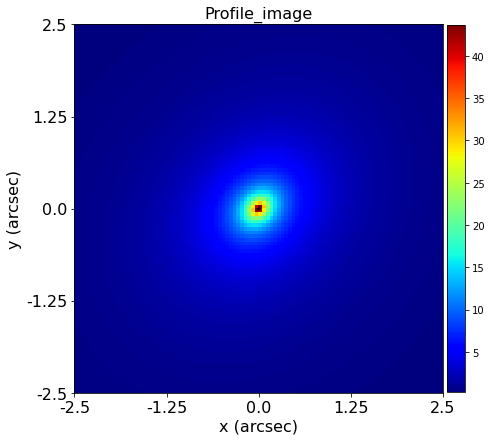

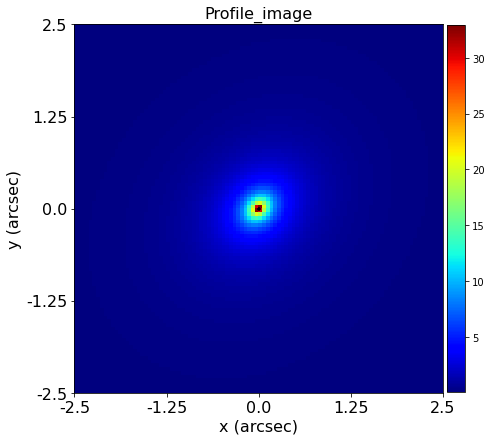

In [17]:
# 1 Change the light profile's effective radius and Sersic index - how does the image's appearance change?
sersic_light_profile_ex1 = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    axis_ratio=0.8,
    phi=45.0,
    intensity=1.0,
    effective_radius=2.0, #1.0->2.0
    sersic_index=2.5,
)
aplt.lp.profile_image(light_profile=sersic_light_profile_ex1, grid=grid)
aplt.lp.profile_image(light_profile=sersic_light_profile, grid=grid) # previous one.

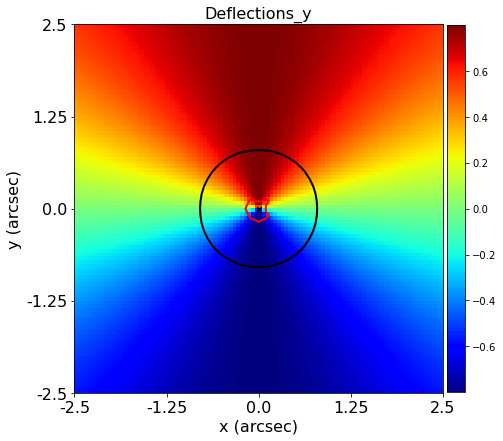

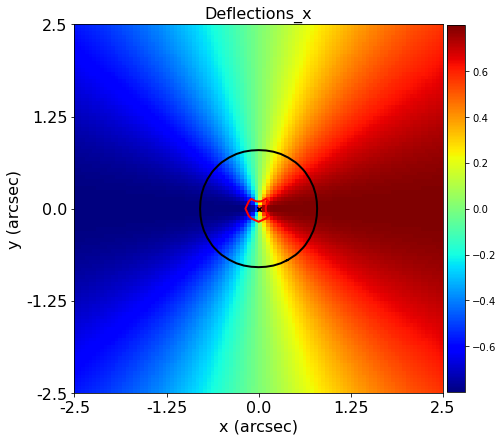

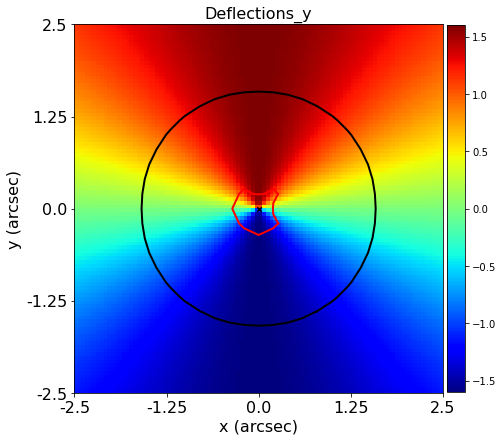

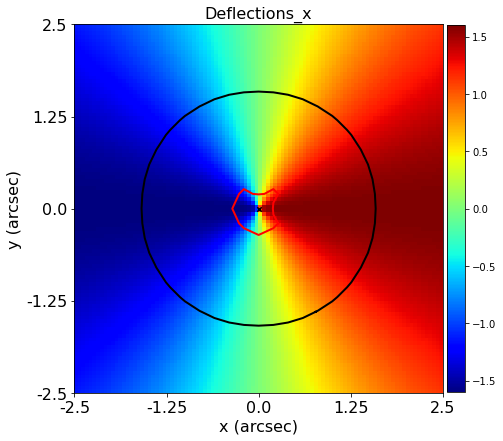

In [20]:
# 2) Change the mass profile's einstein radius - what happens to the deflection angles, potential and convergence? 
sis_mass_profile_ex2 = al.mp.SphericalIsothermal(
    centre=(0., 0.), einstein_radius=0.8 #1.6->0.8
)

aplt.mp.deflections_y(mass_profile=sis_mass_profile_ex2, grid=grid)
aplt.mp.deflections_x(mass_profile=sis_mass_profile_ex2, grid=grid)

aplt.mp.deflections_y(mass_profile=sis_mass_profile, grid=grid) #previous one
aplt.mp.deflections_x(mass_profile=sis_mass_profile, grid=grid)

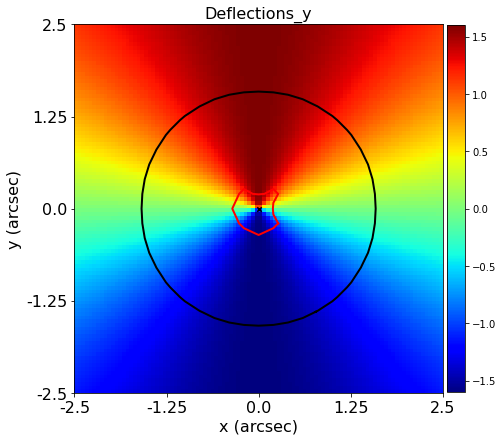

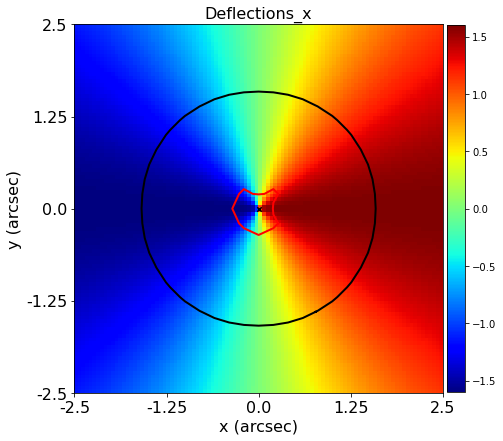

In [27]:
# 3) Experiment with different light-profiles and mass-profiles in the light_profiles and mass_profiles modules. 
# In particular, use the EllipticalIsothermal profile to introduce ellipticity into a mass profile.

sis_mass_profile_ex3 = al.mp.EllipticalIsothermal(
    centre=(0., 0.), einstein_radius=1.6, axis_ratio = 100.0
)

aplt.mp.deflections_y(mass_profile=sis_mass_profile_ex3, grid=grid)
aplt.mp.deflections_x(mass_profile=sis_mass_profile_ex3, grid=grid)